In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
node_df = pd.read_csv("../data/opensea_nodes_oct16.csv")
print(len(node_df))

5123


In [4]:
edge_df = pd.read_csv("../data/opensea_edges_oct16.csv")
edge_df['month'] = edge_df['Timestamp'].str[:7]
edge_df['date'] = edge_df['Timestamp'].str[:10]
edge_df['Timestamp'] = pd.to_datetime(edge_df['Timestamp'])
edge_df['TotalPrice'] = edge_df['TotalPrice'].astype("float")/(10**18)


# Fixing the column names (Seller and Winner columns are switched in this version of data)
edge_df = edge_df.rename(columns = {'SellerAddress': 'WinnerAddress', 'WinnerAddress': 'SellerAddress'})
print(edge_df.shape)

(175428, 18)


##### Check if 0x0000 address exists

In [5]:
check_zeroAddr = edge_df.fillna('')
len(check_zeroAddr[check_zeroAddr['SellerAddress'].str.contains('0x000000000000000')])

0

##### Check duplicates

In [6]:
print("Count after dropping duplicates:", len(edge_df.drop_duplicates()))
print("Complete duplicate counts:", len(edge_df) - len(edge_df.drop_duplicates()))

Count after dropping duplicates: 175243
Complete duplicate counts: 185


In [7]:
# Dropping duplicates
edge_df = edge_df.drop_duplicates()

##### Check the number of wallet addresses in the edge data

In [8]:
sellerAddr = edge_df['SellerAddress'].dropna().drop_duplicates().values.flatten()
winnerAddr = edge_df['WinnerAddress'].dropna().drop_duplicates().values.flatten()
bidderAddr = edge_df['FromAccountAddress'].dropna().drop_duplicates().values.flatten()

print("Unique wallet address count in SellerAddress:", len(sellerAddr))
print("Unique wallet address count in WinnerAddress:", len(winnerAddr))
print("Unique wallet address count in FromAccountAddress:", len(bidderAddr))
print("Unique wallet addresses in all:", len(set(sellerAddr.tolist() + winnerAddr.tolist() + bidderAddr.tolist())))

Unique wallet address count in SellerAddress: 2814
Unique wallet address count in WinnerAddress: 4502
Unique wallet address count in FromAccountAddress: 5395
Unique wallet addresses in all: 7495


In [9]:
# Re-creating the node_df
node_df = pd.DataFrame(set(sellerAddr.tolist() + winnerAddr.tolist() + bidderAddr.tolist()), columns = ['node_id'])
len(node_df)

7495

# Ethereum price

** CAVEAT. 9/4/2021 price is missing Used ETH price of 9/3/2021 for that date **

In [10]:
eth_df = pd.read_csv("../data/2015-08-07_2021-10-16_ethereumprice_org.csv")

In [11]:
eth_df.head()

timestamp         open               high                 low  \
0  1634342340  3864.436685  undefined          undefined            
1  1634256000  3791.660000  3894.008262382306  3736.044234259391    
2  1634255940  3786.529466  undefined          undefined            
3  1634169600  3608.188718  3821.805012891714  3590.2101495358984   
4  1634083200  3490.650105  3607.975058253676  3415.4673227830044   

               close  
0  undefined          
1  3866.57            
2  undefined          
3  3788.22            
4  3605.726592398435

In [12]:
eth_df = eth_df[eth_df['open'] != 'undefined']
eth_df['timestamp'] = pd.to_datetime(eth_df['timestamp'], unit='s')
eth_df['date_str'] = eth_df['timestamp'].apply(lambda dt: str(dt)[:10])
eth_df['time_str'] = eth_df['timestamp'].apply(lambda dt: str(dt)[-8:])
eth_df = eth_df[eth_df['time_str'] == "00:00:00"]
eth_df = eth_df[['date_str', 'open']].set_index('date_str')
eth_df.columns = ["eth_open_price"]

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [13]:
eth_df = eth_df.append(pd.DataFrame([3787.989114], index=['2021-09-04'], columns=['eth_open_price']))

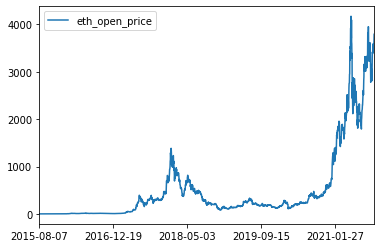

In [14]:
eth_df.sort_index().plot()

In [15]:
edge_df = edge_df.join(eth_df, on='date')
edge_df['TotalPriceUSD'] = edge_df['TotalPrice'] * edge_df['eth_open_price']

# Exploration starts

In [16]:
print("Count of event types")
edge_df['EventType'].value_counts()

Count of event types


created          65631
cancelled        26856
bid_entered      26796
transfer         22301
successful       17358
bid_withdrawn    16301
Name: EventType, dtype: int64

In [17]:
eth_df

eth_open_price
2021-10-15  3791.660000   
2021-10-14  3608.188718   
2021-10-13  3490.650105   
2021-10-12  3542.701251   
2021-10-11  3410.000000   
...                 ...   
2015-08-10  1.200000      
2015-08-09  1.200000      
2015-08-08  1.200000      
2015-08-07  3.000000      
2021-09-04  3787.989114   

[2262 rows x 1 columns]

In [18]:
edge_df[edge_df['TokenId'] == 3100]

WinnerAddress  \
126795  NaN                                          
126796  NaN                                          
126797  NaN                                          
126798  NaN                                          
126799  NaN                                          
126800  NaN                                          
126801  NaN                                          
126802  0x7b8961f67382c51c389726667ef7dd7cf95fefd3   
126803  NaN                                          
126804  NaN                                          
126805  NaN                                          
126806  NaN                                          
126807  NaN                                          
126808  NaN                                          
126809  NaN                                          
126810  NaN                                          
126811  NaN                                          
126812  NaN                                          
126813  NaN                                          
126814  NaN                                          
126815  NaN                                          
126816  NaN                                          
126817  NaN                                          
126818  NaN                                          
126819  NaN                                          
126820  NaN                                          
126821  NaN                                          
126822  NaN                                          
126823  0x6611fe71c233e4e7510b2795c242c9a57790b376   
126824  NaN                                          
126825  NaN                                          
126826  NaN                                          
126827  NaN                                          
126828  NaN                                          
126829  NaN                                          
126830  NaN                                          
126831  NaN                                          
126832  NaN                                          

                                     SellerAddress           Timestamp  \
126795  NaN                                        2021-09-14 22:47:08   
126796  NaN                                        2021-09-14 11:42:33   
126797  NaN                                        2021-08-30 16:00:57   
126798  NaN                                        2021-08-28 17:16:36   
126799  NaN                                        2021-08-08 11:16:10   
126800  NaN                                        2021-08-01 12:28:41   
126801  NaN                                        2021-07-05 10:44:27   
126802  0x6611fe71c233e4e7510b2795c242c9a57790b376 2021-03-11 20:57:01   
126803  NaN                                        2021-03-11 20:54:14   
126804  NaN                                        2021-03-04 06:37:43   
126805  NaN                                        2021-03-02 08:04:26   
126806  NaN                                        2021-03-02 07:16:52   
126807  NaN                                        2021-03-01 20:47:54   
126808  NaN                                        2021-02-17 17:09:28   
126809  NaN                                        2021-02-15 05:02:03   
126810  NaN                                        2021-02-14 16:08:37   
126811  NaN                                        2021-02-14 00:58:32   
126812  NaN                                        2021-01-27 04:43:50   
126813  NaN                                        2021-01-23 21:13:46   
126814  NaN                                        2020-12-14 19:52:44   
126815  NaN                                        2020-12-12 18:47:16   
126816  NaN                                        2020-09-26 13:57:53   
126817  NaN                                        2020-09-25 18:19:35   
126818  NaN                                        2020-01-01 04:42:28   
126819  NaN                                        2018-10-02 12:56:14   
126820

In [19]:
sell_df = edge_df[(edge_df['EventType'] == "successful")&(edge_df['TotalPrice'] < 4200)]

In [20]:
print("The famous 3100's transaction history (total {} transactions)".format(len(edge_df[edge_df['TokenId'] == 3100])))
edge_df[edge_df['TokenId'] == 3100]

The famous 3100's transaction history (total 38 transactions)


WinnerAddress  \
126795  NaN                                          
126796  NaN                                          
126797  NaN                                          
126798  NaN                                          
126799  NaN                                          
126800  NaN                                          
126801  NaN                                          
126802  0x7b8961f67382c51c389726667ef7dd7cf95fefd3   
126803  NaN                                          
126804  NaN                                          
126805  NaN                                          
126806  NaN                                          
126807  NaN                                          
126808  NaN                                          
126809  NaN                                          
126810  NaN                                          
126811  NaN                                          
126812  NaN                                          
126813  NaN                                          
126814  NaN                                          
126815  NaN                                          
126816  NaN                                          
126817  NaN                                          
126818  NaN                                          
126819  NaN                                          
126820  NaN                                          
126821  NaN                                          
126822  NaN                                          
126823  0x6611fe71c233e4e7510b2795c242c9a57790b376   
126824  NaN                                          
126825  NaN                                          
126826  NaN                                          
126827  NaN                                          
126828  NaN                                          
126829  NaN                                          
126830  NaN                                          
126831  NaN                                          
126832  NaN                                          

                                     SellerAddress           Timestamp  \
126795  NaN                                        2021-09-14 22:47:08   
126796  NaN                                        2021-09-14 11:42:33   
126797  NaN                                        2021-08-30 16:00:57   
126798  NaN                                        2021-08-28 17:16:36   
126799  NaN                                        2021-08-08 11:16:10   
126800  NaN                                        2021-08-01 12:28:41   
126801  NaN                                        2021-07-05 10:44:27   
126802  0x6611fe71c233e4e7510b2795c242c9a57790b376 2021-03-11 20:57:01   
126803  NaN                                        2021-03-11 20:54:14   
126804  NaN                                        2021-03-04 06:37:43   
126805  NaN                                        2021-03-02 08:04:26   
126806  NaN                                        2021-03-02 07:16:52   
126807  NaN                                        2021-03-01 20:47:54   
126808  NaN                                        2021-02-17 17:09:28   
126809  NaN                                        2021-02-15 05:02:03   
126810  NaN                                        2021-02-14 16:08:37   
126811  NaN                                        2021-02-14 00:58:32   
126812  NaN                                        2021-01-27 04:43:50   
126813  NaN                                        2021-01-23 21:13:46   
126814  NaN                                        2020-12-14 19:52:44   
126815  NaN                                        2020-12-12 18:47:16   
126816  NaN                                        2020-09-26 13:57:53   
126817  NaN                                        2020-09-25 18:19:35   
126818  NaN                                        2020-01-01 04:42:28   
126819  NaN                                        2018-10-02 12:56:14   
126820

# How has the price changed over time?
Timeline of average transaction amount

** We took out the highest total price (4,200 ETH). But note that there are other top price transactions.**

### In ETH

In [21]:
edge_df.sort_values('TotalPrice', ascending=False).head(10)

WinnerAddress  \
126802  0x7b8961f67382c51c389726667ef7dd7cf95fefd3   
41278   0xf4b4a58974524e183c275f3c6ea895bc2368e738   
89290   0x8f7ceefaa1ff5dfd125106ff9e219eff360d57aa   
21830   0xf2a70bedcc1ea9145cfc2eacc670e798a713b9ad   
144495  0xd6a984153acb6c9e2d788f08c2465a1358bb89a7   
51478   0x956d14b8b548ac2db7069ad33d7b86e6d99f2297   
141048  0x7cd3fc0e4ef95897f9b8db951dfc075cc924ebbe   
70743   0xd2c1a0138716f0f9987977111ba14182e6972630   
51484   0x9fce8eb77fb67660cb134f4ee4c82a48f415f812   
70751   0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459   

                                     SellerAddress           Timestamp  \
126802  0x6611fe71c233e4e7510b2795c242c9a57790b376 2021-03-11 20:57:01   
41278   0x03911fecabd6b4809c88e2e6eb856ec932b2ee3e 2021-03-11 00:48:39   
89290   0xe83c750b2708320bb134796c555b80df39a3d97b 2021-07-30 21:24:47   
21830   0x389747708cfe615ca6825243d476c0ebe268e192 2021-09-11 18:41:23   
144495  0x49705967e4a9e3688a393e88eea088562c56ee1f 2021-07-30 18:36:56   
51478   0x9fce8eb77fb67660cb134f4ee4c82a48f415f812 2021-08-24 06:34:02   
141048  0xfab9b89d9a0317f0f2a0e6643a1c956c66550ed4 2021-08-06 18:18:56   
70743   0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459 2021-09-04 21:39:01   
51484   0x2f2f237d2e655cc0a6f6fef761e5aef13087e71f 2021-08-04 02:31:27   
70751   0xaff336d5653776e9ce858d9d28f9d755c53979df 2021-09-04 15:13:02   

         EventType PaymenTokenSymbol  TotalPrice  TokenId  \
126802  successful  ETH               4200.0      3100      
41278   successful  ETH               4200.0      7804      
89290   successful  ETH               2250.0      5217      
21830   successful  ETH               2000.0      8857      
144495  successful  ETH               1600.0      2140      
51478   successful  ETH               1600.0      7252      
141048  successful  ETH               1500.0      2338      
70743   successful  ETH               1319.0      6275      
51484   successful  ETH               1000.0      7252      
70751   successful  ETH               1000.0      6275      

                              AssetContractAddress  AssetId  TransactionId  \
126802  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  176563   89314752.0      
41278   0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  176783   89061015.0      
89290   0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  178333   142318577.0     
21830   0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  177099   162686282.0     
144495  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  169977   142265205.0     
51478   0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  177080   152625237.0     
141048  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  178953   144996374.0     
70743   0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  177214   158970847.0     
51484   0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  177080   143940425.0     
70751   0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  177214   158799060.0     

       BidAmount  AssetNumSales                           AssetOwnerAddress  \
126802  NaN       2              0x7b8961f67382c51c389726667ef7dd7cf95fefd3   
41278   NaN       2              0xf4b4a58974524e183c275f3c6ea895bc2368e738   
89290   NaN       2              0xe301612b0751f6d862a27be205fb8e3c40c8c6db   
21830   NaN       2              0xdf37ac79f8e9b698c4ab57d30a41e7f272331391   
144495  NaN       3              0xd6a984153acb6c9e2d788f08c2465a1358bb89a7   
51478   NaN       2              0x0a8f4037729accb854da856431a87b8a264d8c40   
141048  NaN       4              0x7cd3fc0e4ef95897f9b8db951dfc075cc924ebbe   
70743   NaN       2              0xd2c1a0138716f0f9987977111ba14182e6972630   
51484   NaN       2              0x0a8f4037729accb854da856431a87b8a264d8c40   
70751   NaN       2              0xd2c1a0138716f0f9987977111ba14182e6972630   

       FromAccountAddress  UsedEthscan  \
126802  NaN                True          
41278   NaN                False         
89290   NaN                False         
21830   NaN                False         
144495  NaN     

In [22]:
print("EXCLUDED 4200ETH transactions")
sell_df['TotalPrice'].describe()

EXCLUDED 4200ETH transactions


count    17356.000000
mean     31.086656   
std      56.975856   
min      0.000000    
25%      1.150000    
50%      18.250000   
75%      36.000000   
max      2250.000000 
Name: TotalPrice, dtype: float64

In [23]:
# Filter out zero ETH transaction
nonzero_trans = sell_df[sell_df['TotalPrice'] > 0]
print(nonzero_trans.shape)
nonzero_trans['TotalPrice'].describe()

(16297, 20)


count    1.629700e+04
mean     3.310671e+01
std      5.822650e+01
min      1.000000e-18
25%      2.400000e+00
50%      1.999000e+01
75%      3.990000e+01
max      2.250000e+03
Name: TotalPrice, dtype: float64

In [24]:
nonzero_trans[['month', 'TotalPrice']].groupby('month').mean()

TotalPrice
month              
2017-06  0.206060  
2017-07  0.536906  
2017-08  0.493683  
2017-09  0.239074  
2017-10  0.168846  
2017-11  0.139256  
2017-12  0.188118  
2018-01  0.262923  
2018-02  0.131136  
2018-03  0.676000  
2018-04  0.198462  
2018-05  0.143976  
2018-06  0.115542  
2018-07  0.154091  
2018-08  0.230119  
2018-09  0.304711  
2018-10  0.348670  
2018-11  0.294519  
2018-12  0.343630  
2019-01  0.466276  
2019-02  0.477187  
2019-03  0.685000  
2019-04  1.368830  
2019-05  0.628890  
2019-06  0.820000  
2019-07  0.388044  
2019-08  0.543871  
2019-09  0.517421  
2019-10  0.423478  
2019-11  0.366961  
2019-12  0.755029  
2020-01  1.220797  
2020-02  1.055584  
2020-03  0.974667  
2020-04  2.044421  
2020-05  2.478493  
2020-06  2.197816  
2020-07  1.518468  
2020-08  1.284667  
2020-09  3.845645  
2020-10  6.589544  
2020-11  9.244375  
2020-12  8.657714  
2021-01  10.061186 
2021-02  20.960694 
2021-03  33.115487 
2021-04  31.497614 
2021-05  28.541726 
2021-06  21.542773 
2021-07  41.838771 
2021-08  84.546137 
2021-09  123.177214
2021-10  140.698026

Text(0.5, 1.0, 'Monthly average transaction amount in ETH')

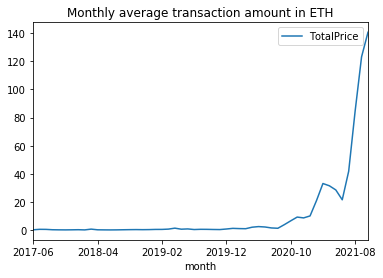

In [25]:
nonzero_trans[['month', 'TotalPrice']].groupby('month').mean().plot()
plt.title("Monthly average transaction amount in ETH")

Text(0.5, 1.0, 'Daily average transaction amount in ETH')

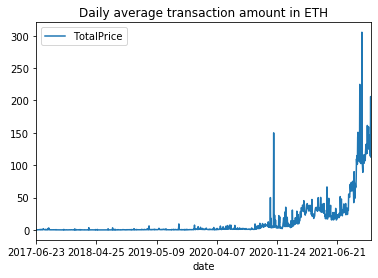

In [26]:
nonzero_trans[['date', 'TotalPrice']].groupby('date').mean().plot()
plt.title("Daily average transaction amount in ETH")

### In USD

In [27]:
sell_df.sort_values('TotalPriceUSD', ascending=False).head()

WinnerAddress  \
21830   0xf2a70bedcc1ea9145cfc2eacc670e798a713b9ad   
89290   0x8f7ceefaa1ff5dfd125106ff9e219eff360d57aa   
51478   0x956d14b8b548ac2db7069ad33d7b86e6d99f2297   
70743   0xd2c1a0138716f0f9987977111ba14182e6972630   
141048  0x7cd3fc0e4ef95897f9b8db951dfc075cc924ebbe   

                                     SellerAddress           Timestamp  \
21830   0x389747708cfe615ca6825243d476c0ebe268e192 2021-09-11 18:41:23   
89290   0xe83c750b2708320bb134796c555b80df39a3d97b 2021-07-30 21:24:47   
51478   0x9fce8eb77fb67660cb134f4ee4c82a48f415f812 2021-08-24 06:34:02   
70743   0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459 2021-09-04 21:39:01   
141048  0xfab9b89d9a0317f0f2a0e6643a1c956c66550ed4 2021-08-06 18:18:56   

         EventType PaymenTokenSymbol  TotalPrice  TokenId  \
21830   successful  ETH               2000.0      8857      
89290   successful  ETH               2250.0      5217      
51478   successful  ETH               1600.0      7252      
70743   successful  ETH               1319.0      6275      
141048  successful  ETH               1500.0      2338      

                              AssetContractAddress  AssetId  TransactionId  \
21830   0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  177099   162686282.0     
89290   0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  178333   142318577.0     
51478   0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  177080   152625237.0     
70743   0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  177214   158970847.0     
141048  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  178953   144996374.0     

       BidAmount  AssetNumSales                           AssetOwnerAddress  \
21830   NaN       2              0xdf37ac79f8e9b698c4ab57d30a41e7f272331391   
89290   NaN       2              0xe301612b0751f6d862a27be205fb8e3c40c8c6db   
51478   NaN       2              0x0a8f4037729accb854da856431a87b8a264d8c40   
70743   NaN       2              0xd2c1a0138716f0f9987977111ba14182e6972630   
141048  NaN       4              0x7cd3fc0e4ef95897f9b8db951dfc075cc924ebbe   

       FromAccountAddress  UsedEthscan  \
21830   NaN                False         
89290   NaN                False         
51478   NaN                False         
70743   NaN                True          
141048  NaN                False         

                                                           TransactionHash  \
21830   0xd8c7928d868a0cc78c8f3827f2af65fefd838410b462a8a6d95913772cba6078   
89290   0x76869ad4d3c2ddadd5bbc30715bcc6a51616f0ce9a24dee10272925c1448b231   
51478   0xf7ffa7656643d5cad05d748a98a8caff91932a4decf90fac06f36b50c7c05011   
70743   0xd8f1cfa6f0aa84068ca121f5672566522c2332f24d3f41c8b10898f3acbafd4d   
141048  0xf6a459ea3161b4c30c666dce101322b9ddcfb3a5635c19a0b8dd9b58c2ade684   

          month        date  eth_open_price  TotalPriceUSD  
21830   2021-09  2021-09-11  3222.850000     6.445700e+06   
89290   2021-07  2021-07-30  2386.870000     5.370458e+06   
51478   2021-08  2021-08-24  3325.178649     5.320286e+06   
70743   2021-09  2021-09-04  3787.989114     4.996358e+06   
141048  2021-08  2021-08-06  2829.048483     4.243573e+06

In [28]:
sell_df['TotalPriceUSD'].describe()

count    1.735500e+04
mean     8.302850e+04
std      1.703382e+05
min      0.000000e+00
25%      2.884556e+02
50%      3.541500e+04
75%      8.370666e+04
max      6.445700e+06
Name: TotalPriceUSD, dtype: float64

In [29]:
# Filter out zero ETH transaction
print(nonzero_trans.shape)
nonzero_trans['TotalPriceUSD'].describe()

(16297, 20)


count    1.629600e+04
mean     8.842413e+04
std      1.744238e+05
min      2.861400e-16
25%      7.359538e+02
50%      3.906697e+04
75%      9.060000e+04
max      6.445700e+06
Name: TotalPriceUSD, dtype: float64

In [30]:
nonzero_trans[['month', 'TotalPriceUSD']].groupby('month').mean()

TotalPriceUSD
month                 
2017-06  60.064261    
2017-07  123.531151   
2017-08  129.624622   
2017-09  69.995127    
2017-10  52.882338    
2017-11  51.379516    
2017-12  120.413247   
2018-01  286.007368   
2018-02  111.773034   
2018-03  551.641715   
2018-04  107.752731   
2018-05  90.300829    
2018-06  67.287100    
2018-07  71.649277    
2018-08  69.994112    
2018-09  71.046178    
2018-10  74.750348    
2018-11  41.550251    
2018-12  36.352683    
2019-01  60.239111    
2019-02  67.722162    
2019-03  94.104229    
2019-04  227.375146   
2019-05  130.525253   
2019-06  219.757694   
2019-07  93.297370    
2019-08  114.097218   
2019-09  96.998240    
2019-10  75.405545    
2019-11  61.839318    
2019-12  99.823864    
2020-01  180.206460   
2020-02  241.729923   
2020-03  145.683378   
2020-04  387.138815   
2020-05  508.388222   
2020-06  512.139147   
2020-07  384.982917   
2020-08  507.463141   
2020-09  1375.308425  
2020-10  2395.084603  
2020-11  4509.113051  
2020-12  5559.193443  
2021-01  12285.827058 
2021-02  37517.590772 
2021-03  57649.996302 
2021-04  70500.496913 
2021-05  91196.004676 
2021-06  48509.423071 
2021-07  95330.029863 
2021-08  259436.325792
2021-09  412177.062891
2021-10  463721.421280

Text(0.5, 1.0, 'Monthly average transaction amount in ETH')

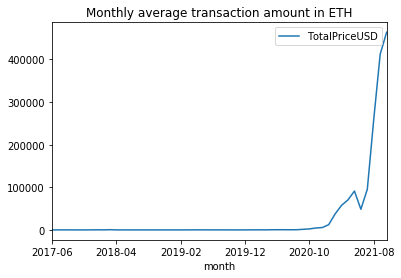

In [31]:
nonzero_trans[['month', 'TotalPriceUSD']].groupby('month').mean().plot()
plt.title("Monthly average transaction amount in ETH")

Text(0.5, 1.0, 'Daily average transaction amount in ETH')

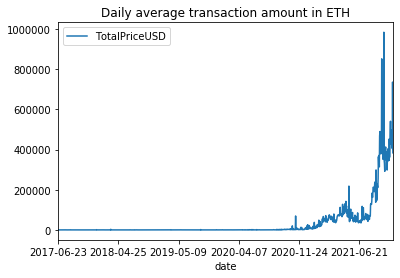

In [32]:
nonzero_trans[['date', 'TotalPriceUSD']].groupby('date').mean().plot()
plt.title("Daily average transaction amount in ETH")

# How has the "sell" volume changed over time?
Timeline of sell occurrences. Only counting nonzero transactions

Text(0.5, 1.0, 'Sell volume occurrences timeline (monthly)')

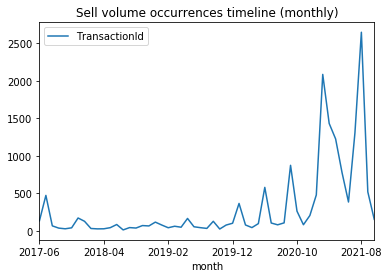

In [33]:
nonzero_trans[['month', 'TransactionId']].groupby('month').count().plot()
plt.title("Sell volume occurrences timeline (monthly)")

Text(0.5, 1.0, 'Sell volume occurrences timeline (daily)')

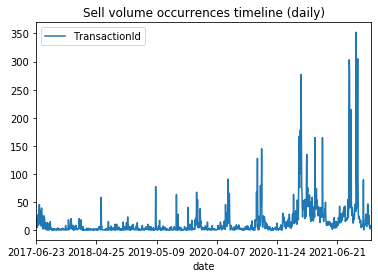

In [34]:
nonzero_trans[['date', 'TransactionId']].groupby('date').count().plot()
plt.title("Sell volume occurrences timeline (daily)")

# Which assets have increased/decreased in price the most?

In [35]:
nonzero_sell_all = edge_df[(edge_df['EventType'] == 'successful') * edge_df['TotalPrice'] > 0]
first_price = nonzero_sell_all.loc[nonzero_sell_all.groupby('TokenId')['Timestamp'].idxmin(), ['TokenId', 'TotalPriceUSD']]
latest_price = nonzero_sell_all.loc[nonzero_sell_all.groupby('TokenId')['Timestamp'].idxmax(), ['TokenId', 'TotalPriceUSD']]

In [36]:
price_change_df = first_price.set_index('TokenId').join(latest_price.set_index('TokenId'), rsuffix="latest")
price_change_df.columns = ['first_trans_price', 'latest_trans_price']
price_change_df['abs_change'] = price_change_df['latest_trans_price'] - price_change_df['first_trans_price']
price_change_df['perc_change'] = (price_change_df['latest_trans_price'] - price_change_df['first_trans_price']) / price_change_df['first_trans_price']

In [37]:
print("Top gain NFT by USD")
price_change_df.sort_values('perc_change', ascending=False).head(10)

Top gain NFT by USD


first_trans_price  latest_trans_price    abs_change   perc_change
TokenId                                                                   
4156     1.919300e-15       1.203039e+06        1.203039e+06  6.268112e+20
1784     2.861400e-16       3.763565e+02        3.763565e+02  1.315288e+18
9923     1.493885e-13       1.124845e+04        1.124845e+04  7.529662e+16
1376     6.090800e-08       4.055955e+04        4.055955e+04  6.659150e+11
5104     2.536800e-04       3.339461e+05        3.339461e+05  1.316407e+09
8100     3.270023e-06       1.340449e+03        1.340449e+03  4.099203e+08
2599     3.460092e-01       4.643719e+05        4.643715e+05  1.342079e+06
5621     9.805500e+00       5.887200e+05        5.887102e+05  6.003877e+04
9513     3.929520e+01       1.104026e+06        1.103987e+06  2.809470e+04
9189     1.684980e+01       4.400916e+05        4.400748e+05  2.611751e+04

In [38]:
price_change_df.loc[3100]

first_trans_price     7467768.0
latest_trans_price    7467768.0
abs_change            0.0      
perc_change           0.0      
Name: 3100, dtype: float64

In [39]:
print("Note that the famous 3100 Token has no record of non-zero transactions until 4200 ETH")
edge_df[edge_df['TokenId'] == 3100]

Note that the famous 3100 Token has no record of non-zero transactions until 4200 ETH


WinnerAddress  \
126795  NaN                                          
126796  NaN                                          
126797  NaN                                          
126798  NaN                                          
126799  NaN                                          
126800  NaN                                          
126801  NaN                                          
126802  0x7b8961f67382c51c389726667ef7dd7cf95fefd3   
126803  NaN                                          
126804  NaN                                          
126805  NaN                                          
126806  NaN                                          
126807  NaN                                          
126808  NaN                                          
126809  NaN                                          
126810  NaN                                          
126811  NaN                                          
126812  NaN                                          
126813  NaN                                          
126814  NaN                                          
126815  NaN                                          
126816  NaN                                          
126817  NaN                                          
126818  NaN                                          
126819  NaN                                          
126820  NaN                                          
126821  NaN                                          
126822  NaN                                          
126823  0x6611fe71c233e4e7510b2795c242c9a57790b376   
126824  NaN                                          
126825  NaN                                          
126826  NaN                                          
126827  NaN                                          
126828  NaN                                          
126829  NaN                                          
126830  NaN                                          
126831  NaN                                          
126832  NaN                                          

                                     SellerAddress           Timestamp  \
126795  NaN                                        2021-09-14 22:47:08   
126796  NaN                                        2021-09-14 11:42:33   
126797  NaN                                        2021-08-30 16:00:57   
126798  NaN                                        2021-08-28 17:16:36   
126799  NaN                                        2021-08-08 11:16:10   
126800  NaN                                        2021-08-01 12:28:41   
126801  NaN                                        2021-07-05 10:44:27   
126802  0x6611fe71c233e4e7510b2795c242c9a57790b376 2021-03-11 20:57:01   
126803  NaN                                        2021-03-11 20:54:14   
126804  NaN                                        2021-03-04 06:37:43   
126805  NaN                                        2021-03-02 08:04:26   
126806  NaN                                        2021-03-02 07:16:52   
126807  NaN                                        2021-03-01 20:47:54   
126808  NaN                                        2021-02-17 17:09:28   
126809  NaN                                        2021-02-15 05:02:03   
126810  NaN                                        2021-02-14 16:08:37   
126811  NaN                                        2021-02-14 00:58:32   
126812  NaN                                        2021-01-27 04:43:50   
126813  NaN                                        2021-01-23 21:13:46   
126814  NaN                                        2020-12-14 19:52:44   
126815  NaN                                        2020-12-12 18:47:16   
126816  NaN                                        2020-09-26 13:57:53   
126817  NaN                                        2020-09-25 18:19:35   
126818  NaN                                        2020-01-01 04:42:28   
126819  NaN                                        2018-10-02 12:56:14   
126820

In [40]:
print("Top loss NFT in USD")
price_change_df.dropna().sort_values('perc_change', ascending=False).tail(50)

Top loss NFT in USD


first_trans_price  latest_trans_price     abs_change  perc_change
TokenId                                                                   
3760     141.167116         91.496147          -49.670969     -0.351859   
6734     88398.334704       57284.880000       -31113.454704  -0.351969   
9620     63254.334000       40950.300000       -22304.034000  -0.352609   
6402     296157.018932      191250.000000      -104907.018932 -0.354228   
2211     61985.413987       40008.289322       -21977.124665  -0.354553   
2493     67098.320000       42962.075000       -24136.245000  -0.359715   
1813     67098.320000       42761.808400       -24336.511600  -0.362699   
3604     67098.320000       42298.240300       -24800.079700  -0.369608   
7343     93.716700          58.477000          -35.239700     -0.376024   
1512     86.066790          53.391600          -32.675190     -0.379649   
7957     68.043500          40.715500          -27.328000     -0.401625   
9023     67428.711000       39890.075682       -27538.635318  -0.408411   
7489     73792.159508       43605.213546       -30186.945962  -0.409081   
3286     25.834900          15.235500          -10.599400     -0.410274   
6692     65.389200          37.966000          -27.423200     -0.419384   
6136     63254.334000       36548.875138       -26705.458862  -0.422192   
6927     49.753800          28.680000          -21.073800     -0.423562   
4461     109842.880000      60519.972210       -49322.907790  -0.449031   
950      124.022584         68.325896          -55.696688     -0.449085   
4584     81062.746681       44279.291000       -36783.455681  -0.453765   
1638     73.960000          39.487920          -34.472080     -0.466091   
3371     49.753800          25.617000          -24.136800     -0.485125   
8198     80303.322613       40734.806697       -39568.515916  -0.492738   
1539     66.692500          33.811500          -32.881000     -0.493024   
9619     110.450900         54.975170          -55.475730     -0.502266   
3527     69071.800000       34022.104200       -35049.695800  -0.507439   
9704     67.644000          32.109000          -35.535000     -0.525324   
7062     67.644000          32.109000          -35.535000     -0.525324   
1995     92689.516000       43750.960000       -48938.556000  -0.527984   
3478     71.931700          33.764700          -38.167000     -0.530601   
1236     60.810200          28.124000          -32.686200     -0.537512   
5445     43.755400          19.869700          -23.885700     -0.545891   
661      87188.103727       35548.852500       -51639.251227  -0.592274   
1340     88550.591410       36017.616600       -52532.974810  -0.593254   
3767     93.802000          37.234300          -56.567700     -0.603054   
1425     96.555000          35.332500          -61.222500     -0.634069   
9332     330999.021159      106793.605000      -224205.416159 -0.677360   
2720     67.644000          20.493600          -47.150400     -0.697037   
2966     136.854000         37.966000          -98.888000     -0.722580   
1170     75.132200          18.282600          -56.849600     -0.756661   
8432     29.290000          2.764100           -26.525900     -0.905630   
283      50405.114200       385.051800         -50020.062400  -0.992361   
7684     38747.800000       3.011010           -38744.788990  -0.999922   
9990     44317.070000       0.028800           -44317.041200  -0.999999   
8622     40538.222203       0.025200           -40538.197003  -0.999999   
2743     61990.630145       0.032400           -61990.597745  -0.999999   
8811     120017.500000      0.023891           -120017.476109 -1.000000   
6037     53958.745000       0.007200           -53958.737800  -1.000000   
9000     52542.840000       0.001015           -52542.838985  -1.000000   
3702     61275.185000       0.000425           -61275.184575  -1.000000

In [41]:
edge_df[edge_df['TokenId'] == 8432]

WinnerAddress  \
30031  NaN                                          
30032  NaN                                          
30033  NaN                                          
30034  NaN                                          
30035  NaN                                          
30036  NaN                                          
30037  NaN                                          
30038  NaN                                          
30039  NaN                                          
30040  NaN                                          
30041  NaN                                          
30042  NaN                                          
30043  NaN                                          
30044  NaN                                          
30045  NaN                                          
30046  NaN                                          
30047  NaN                                          
30048  NaN                                          
30049  NaN                                          
30050  NaN                                          
30051  NaN                                          
30052  NaN                                          
30053  NaN                                          
30054  NaN                                          
30055  NaN                                          
30056  NaN                                          
30057  NaN                                          
30058  NaN                                          
30059  NaN                                          
30060  NaN                                          
30061  NaN                                          
30062  NaN                                          
30063  NaN                                          
30064  NaN                                          
30065  NaN                                          
30066  NaN                                          
30067  NaN                                          
30068  NaN                                          
30069  NaN                                          
30070  0x0a4eafeb533d4111a1fe3a8b323c468976ac2323   
30071  NaN                                          
30072  0x5b098b00621eda6a96b7a476220661ad265f083f   
30073  NaN                                          
30074  NaN                                          

                                    SellerAddress           Timestamp  \
30031  NaN                                        2021-04-27 16:28:17   
30032  NaN                                        2021-04-25 16:02:41   
30033  NaN                                        2021-03-06 17:21:55   
30034  NaN                                        2021-03-06 16:47:50   
30035  NaN                                        2021-03-05 17:03:52   
30036  NaN                                        2021-03-05 16:05:05   
30037  NaN                                        2021-03-05 15:47:58   
30038  NaN                                        2021-03-05 15:37:54   
30039  NaN                                        2021-03-05 15:07:59   
30040  NaN                                        2021-02-14 19:11:48   
30041  NaN                                        2021-02-14 17:28:53   
30042  NaN                                        2021-02-14 17:23:48   
30043  NaN                                        2021-02-14 17:04:47   
30044  NaN                                        2021-02-04 09:31:34   
30045  NaN                                        2021-02-03 23:01:52   
30046  NaN                                        2021-02-01 16:38:35   
30047  NaN                                        2021-02-01 16:27:20   
30048  NaN                                        2021-01-31 20:36:14   
30049  NaN                                        2021-01-31 15:24:48   
30050  NaN                                        2021-01-28 22:52:40   
30051  NaN                                        2021-01-28 22:02:06   
30052  NaN                                  

# Which assets have been sold the most? How has this price changed over time? How many people have held this asset?

**Note that the dataset does NOT have off-platform transactions**

**Note that we took out zero ETH transactions **

In [42]:
print("Top 10 most-sold asset")
nonzero_sell_all[['TokenId', 'TransactionId']].groupby('TokenId').count().sort_values('TransactionId', ascending=False).head(10)

Top 10 most-sold asset


TransactionId
TokenId               
3914     16           
8970     14           
6989     14           
2937     13           
2832     13           
6788     13           
4130     12           
9507     12           
9322     12           
7443     12

In [43]:
nonzero_sell_all[nonzero_sell_all['TokenId'] == 3914]

WinnerAddress  \
110779  0xd93bc9654df5a50e0e65df55d09ba7b47fb95cd    
110786  0xccc003f10b7278d86fbe56f5c40d1feb4d2b9e40   
110794  0x20a6f27e11edc08d32c21454b4625eecfb22bb21   
110801  0x850cae094ce34c564327818631287a75d3cee6ca   
110828  0x8a3d2efdb70c3fa23e0f38bdcb95c4f39ad1e127   
110846  0x6ec30fd91a504aad948839b985c7263888b2ad68   
110851  0x4c6d87a0df5024003b1439a2152bb2d622ca342b   
110856  0x13816f65ba8195768e6825eb774fd3c6a05a0ac8   
110862  0xadc229c0dbec4af386ac7b96920369f9770ee6e0   
110868  0xfc624f8f58db41bdb95aedee1de3c1cf047105f1   
110876  0x5b331eb6df00b5765894f88e54d2a87128188ec7   
110891  0x50c946cb9757d6de490099c0ec185a0dfe29974b   
110894  0xee402489d83e2b22d496910f8c810d35a3ad7b25   
110903  0x51ec5e1b8b3c4c6bae49619e657f94c4ad577b45   
110913  0x0d41f957181e584db82d2e316837b2de1738c477   
110916  0xbfa319ef5529b88a0ad94dcc36d438dcafac0e52   

                                     SellerAddress           Timestamp  \
110779  0xccc003f10b7278d86fbe56f5c40d1feb4d2b9e40 2021-08-07 00:51:31   
110786  0x20a6f27e11edc08d32c21454b4625eecfb22bb21 2021-08-01 17:15:34   
110794  0x850cae094ce34c564327818631287a75d3cee6ca 2021-07-30 20:11:58   
110801  0x8a3d2efdb70c3fa23e0f38bdcb95c4f39ad1e127 2021-07-26 07:51:48   
110828  0x6ec30fd91a504aad948839b985c7263888b2ad68 2021-04-17 05:29:40   
110846  0x4c6d87a0df5024003b1439a2152bb2d622ca342b 2021-04-12 22:59:29   
110851  0x13816f65ba8195768e6825eb774fd3c6a05a0ac8 2021-02-22 22:54:46   
110856  0xadc229c0dbec4af386ac7b96920369f9770ee6e0 2021-02-21 21:38:55   
110862  0xfc624f8f58db41bdb95aedee1de3c1cf047105f1 2021-01-31 01:36:50   
110868  0xee3766e4f996dc0e0f8c929954eaafef3441de87 2021-01-24 00:06:11   
110876  0x566f193d80c76a324cf5e521d62657f4c4d4ccc5 2021-01-06 15:39:20   
110891  0xee402489d83e2b22d496910f8c810d35a3ad7b25 2020-11-28 20:44:48   
110894  0x624394c3e8699980162fa15e23fdb707d9a53517 2020-11-22 13:58:08   
110903  0xd41f957181e584db82d2e316837b2de1738c477  2020-06-15 11:26:05   
110913  NaN                                        2020-01-03 00:25:57   
110916  NaN                                        2017-11-22 06:50:13   

         EventType PaymenTokenSymbol  TotalPrice  TokenId  \
110779  successful  ETH               100.00      3914      
110786  successful  ETH               66.66       3914      
110794  successful  ETH               42.88       3914      
110801  successful  ETH               38.00       3914      
110828  successful  ETH               35.88       3914      
110846  successful  ETH               42.00       3914      
110851  successful  ETH               42.00       3914      
110856  successful  ETH               25.00       3914      
110862  successful  ETH               7.00        3914      
110868  successful  ETH               5.49        3914      
110876  successful  ETH               6.00        3914      
110891  successful  ETH               4.50        3914      
110894  successful  ETH               3.00        3914      
110903  successful  ETH               1.70        3914      
110913  successful  ETH               1.10        3914      
110916  successful  ETH               0.10        3914      

                              AssetContractAddress  AssetId  TransactionId  \
110779  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  178723   145109237.0     
110786  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  178723   143015042.0     
110794  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  178723   142295785.0     
110801  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  178723   140458394.0     
110828  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  178723   103045323.0     
110846  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  178723   100774419.0     
110851  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  178723   84162518.0      
110856  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  178723   83856378.0      
110862  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  178723   77719422.0      
110868  0xb47e3cd837ddf8e4c57f05d70ab865d

Text(0.5, 1.0, 'Price (USD) timeline for asset 3914')

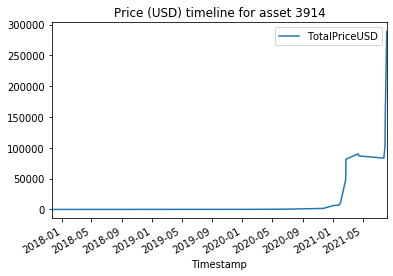

In [44]:
nonzero_sell_all[nonzero_sell_all['TokenId'] == 3914].plot(x='Timestamp', y="TotalPriceUSD")
plt.title("Price (USD) timeline for asset 3914")

Text(0.5, 1.0, 'Price (ETH) timeline for asset 3914')

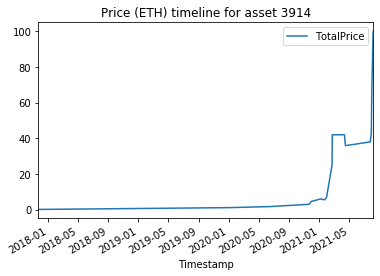

In [45]:
nonzero_sell_all[nonzero_sell_all['TokenId'] == 3914].plot(x='Timestamp', y="TotalPrice")
plt.title("Price (ETH) timeline for asset 3914")

In [46]:
total_count = len(set(sell_df.loc[sell_df['TokenId'] == 3914, 
                                  ['SellerAddress', 'WinnerAddress']].values.flatten())) - 1
print("Wallets that have owned the asset 3914 (TOTAL {} excluding nan and 0x00):".format(total_count))
set(sell_df.loc[sell_df['TokenId'] == 3914, ['SellerAddress', 'WinnerAddress']].values.flatten())

Wallets that have owned the asset 3914 (TOTAL 20 excluding nan and 0x00):


{'0x0d41f957181e584db82d2e316837b2de1738c477',
 '0x13816f65ba8195768e6825eb774fd3c6a05a0ac8',
 '0x20a6f27e11edc08d32c21454b4625eecfb22bb21',
 '0x4c6d87a0df5024003b1439a2152bb2d622ca342b',
 '0x50c946cb9757d6de490099c0ec185a0dfe29974b',
 '0x51ec5e1b8b3c4c6bae49619e657f94c4ad577b45',
 '0x566f193d80c76a324cf5e521d62657f4c4d4ccc5',
 '0x5b331eb6df00b5765894f88e54d2a87128188ec7',
 '0x624394c3e8699980162fa15e23fdb707d9a53517',
 '0x6ec30fd91a504aad948839b985c7263888b2ad68',
 '0x850cae094ce34c564327818631287a75d3cee6ca',
 '0x8a3d2efdb70c3fa23e0f38bdcb95c4f39ad1e127',
 '0xadc229c0dbec4af386ac7b96920369f9770ee6e0',
 '0xbfa319ef5529b88a0ad94dcc36d438dcafac0e52',
 '0xccc003f10b7278d86fbe56f5c40d1feb4d2b9e40',
 '0xd41f957181e584db82d2e316837b2de1738c477',
 '0xd93bc9654df5a50e0e65df55d09ba7b47fb95cd',
 '0xee3766e4f996dc0e0f8c929954eaafef3441de87',
 '0xee402489d83e2b22d496910f8c810d35a3ad7b25',
 '0xfc624f8f58db41bdb95aedee1de3c1cf047105f1',
 nan}

# Which wallet has the most CryptoPunks assets?

In [47]:
print("Current ownership top 10:")
edge_df[['TokenId', 'AssetOwnerAddress']].drop_duplicates()['AssetOwnerAddress'].value_counts().head(10)

Current ownership top 10:


0xb7f7f6c52f2e2fdb1963eab30438024864c313f6    256
0xa25803ab86a327786bb59395fc0164d826b98298    253
0xc352b534e8b987e036a93539fd6897f53488e56a    241
0xb88f61e6fbda83fbfffabe364112137480398018    215
0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647    172
0x69021ae8769586d56791d29615959997c2012b99    147
0xcffc336e6d019c1af58257a0b10bf2146a3f42a4    125
0x269616d549d7e8eaa82dfb17028d0b212d11232a    104
0xd79b937791724e47f193f67162b92cdfbf7abdfd    102
0x4084df8bf74ba73f04eb39b89df698608df7f4b5    98 
Name: AssetOwnerAddress, dtype: int64


# Which wallet has bought assets the most?

In [48]:
print("Purchase count by wallet (top 10)")
sell_df['WinnerAddress'].value_counts().head(10)

Purchase count by wallet (top 10)


0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459    426
0x269616d549d7e8eaa82dfb17028d0b212d11232a    230
0x1919db36ca2fa2e15f9000fd9cdc2edcf863e685    179
0x7d438bf6567673867480b7923669bf349e6c8c12    162
0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7    133
0x78f0269f5b1ca914c8c58993f41181f89e212b27    114
0x650dcdeb6ecf05ae3caf30a70966e2f395d5e9e5    106
0xdde8df9a7dc9f68bdac815f493d1d731de911b5a    102
0x303052148a78a692d7aa89bad454f3e91785488d    100
0x62bdc64a14405e797f86796ea3c2476209ee0bf9    99 
Name: WinnerAddress, dtype: int64

# Which wallet has the most transaction (all types) in CryptoPunks?

In [49]:
transaction_count_by_wallet = pd.DataFrame([edge_df['SellerAddress'].value_counts(), edge_df['WinnerAddress'].value_counts(), edge_df['FromAccountAddress'].value_counts()])
transaction_count_by_wallet = transaction_count_by_wallet.transpose()
transaction_count_by_wallet.columns = ['sell_count', 'win_count', 'bid_count']
transaction_count_by_wallet['total'] = np.sum(transaction_count_by_wallet, axis=1)
transaction_count_by_wallet = transaction_count_by_wallet.fillna(0).astype('int')

In [50]:
print("Top 20 wallets with the highest transaction counts:")
transaction_count_by_wallet.sort_values('total', ascending=False).head(20)

Top 20 wallets with the highest transaction counts:


sell_count  win_count  bid_count  \
0xb7f7f6c52f2e2fdb1963eab30438024864c313f6  0           0          2521        
0x7174039818a41e1ae40fdcfa3e293b0f41592af2  0           167        2093        
0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459  237         426        1293        
0x53ede7cae3eb6a7d11429fe589c0278c9acbe21a  409         18         798         
0x00d7c902fbbcd3c9db2da80a439c94486c50eb81  0           20         779         
0xcbd482af76059e2a5e4a825c4cd5ced9f2dfe286  54          0          729         
0xc352b534e8b987e036a93539fd6897f53488e56a  139         53         576         
0x899241b0c41051313ce36271a7e13d54c94877a1  37          53         576         
0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647  346         34         260         
0x696ed7b26f4b019ceec78dc8b9140ad64a6f354b  40          46         550         
0x7760e0243ca9baa630412865df7b39afba42ff0f  0           122        454         
0x62bdc64a14405e797f86796ea3c2476209ee0bf9  136         99         325         
0xe8723d26ad5f7ff4ea8902d235f0a8f8b8802f6d  40          132        383         
0xf3016b7608acfbec9df4ae1ead36bb5f1bad4ff4  20          35         476         
0x00bd9fd57c423a1b1c969823d409156d90974d77  0           10         520         
0x7d438bf6567673867480b7923669bf349e6c8c12  18          162        281         
0x1919db36ca2fa2e15f9000fd9cdc2edcf863e685  183         179        99          
0xc7c6b96ff2edceaa2b0a4c215112cbac599ab42c  0           0          457         
0xcf0e9b4746cfb97bae329fe5f696969f6564566a  56          54         346         
0x78f0269f5b1ca914c8c58993f41181f89e212b27  79          114        252         

                                            total  
0xb7f7f6c52f2e2fdb1963eab30438024864c313f6  2521   
0x7174039818a41e1ae40fdcfa3e293b0f41592af2  2260   
0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459  1956   
0x53ede7cae3eb6a7d11429fe589c0278c9acbe21a  1225   
0x00d7c902fbbcd3c9db2da80a439c94486c50eb81  799    
0xcbd482af76059e2a5e4a825c4cd5ced9f2dfe286  783    
0xc352b534e8b987e036a93539fd6897f53488e56a  768    
0x899241b0c41051313ce36271a7e13d54c94877a1  666    
0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647  640    
0x696ed7b26f4b019ceec78dc8b9140ad64a6f354b  636    
0x7760e0243ca9baa630412865df7b39afba42ff0f  576    
0x62bdc64a14405e797f86796ea3c2476209ee0bf9  560    
0xe8723d26ad5f7ff4ea8902d235f0a8f8b8802f6d  555    
0xf3016b7608acfbec9df4ae1ead36bb5f1bad4ff4  531    
0x00bd9fd57c423a1b1c969823d409156d90974d77  530    
0x7d438bf6567673867480b7923669bf349e6c8c12  461    
0x1919db36ca2fa2e15f9000fd9cdc2edcf863e685  461    
0xc7c6b96ff2edceaa2b0a4c215112cbac599ab42c  457    
0xcf0e9b4746cfb97bae329fe5f696969f6564566a  456    
0x78f0269f5b1ca914c8c58993f41181f89e212b27  445

# Which wallet has gained/lost the most so far in CryptoPunks?

In [51]:
def calculate_sellUSD(wallet_addr):
    return edge_df.loc[edge_df['SellerAddress'] == wallet_addr, 'TotalPriceUSD'].sum()

def calculate_purchaseUSD(wallet_addr):
    return edge_df.loc[edge_df['WinnerAddress'] == wallet_addr, 'TotalPriceUSD'].sum()

In [52]:
transaction_count_by_wallet['sellUSD'] = [calculate_sellUSD(addr) for addr in transaction_count_by_wallet.index]
transaction_count_by_wallet['purchaseUSD'] = [calculate_purchaseUSD(addr) for addr in transaction_count_by_wallet.index]
transaction_count_by_wallet['netUSD'] = transaction_count_by_wallet['sellUSD'] - transaction_count_by_wallet['purchaseUSD']

In [53]:
print("Wallet that gained the most by USD (top 10)")
transaction_count_by_wallet.sort_values('netUSD', ascending=False).head(10)

Wallet that gained the most by USD (top 10)


sell_count  win_count  bid_count  \
0x6611fe71c233e4e7510b2795c242c9a57790b376  154         95         122         
0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647  346         34         260         
0x6f4a2d3a4f47f9c647d86c929755593911ee91ec  221         5          4           
0xcc7c335f3365ae3f7e4e8c9535dc92780a4add9d  72          3          15          
0x00b278dd68f9d8491795ffaf771120638bef1686  42          61         6           
0x0b88fd87884080bd6d93d341fcca0eea76b03e75  94          10         0           
0x8f6b1e467fbe74d7dd43d59de0558f693c736798  34          12         3           
0xfeeb2d7f276b319896f71431ef64fdf1e4ab8d5b  43          0          0           
0x03911fecabd6b4809c88e2e6eb856ec932b2ee3e  2           7          11          
0xe83c750b2708320bb134796c555b80df39a3d97b  9           33         67          

                                            total       sellUSD   purchaseUSD  \
0x6611fe71c233e4e7510b2795c242c9a57790b376  371    2.994572e+07  9.357039e+05   
0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647  640    2.641242e+07  2.646034e+06   
0x6f4a2d3a4f47f9c647d86c929755593911ee91ec  230    2.305918e+07  7.596340e+04   
0xcc7c335f3365ae3f7e4e8c9535dc92780a4add9d  90     1.618545e+07  4.221858e+05   
0x00b278dd68f9d8491795ffaf771120638bef1686  109    1.240190e+07  5.075854e+03   
0x0b88fd87884080bd6d93d341fcca0eea76b03e75  104    1.076503e+07  6.635070e+05   
0x8f6b1e467fbe74d7dd43d59de0558f693c736798  49     1.044419e+07  6.944456e+05   
0xfeeb2d7f276b319896f71431ef64fdf1e4ab8d5b  43     9.104756e+06  0.000000e+00   
0x03911fecabd6b4809c88e2e6eb856ec932b2ee3e  20     9.019228e+06  5.278276e+03   
0xe83c750b2708320bb134796c555b80df39a3d97b  109    9.168184e+06  1.964153e+05   

                                                  netUSD  
0x6611fe71c233e4e7510b2795c242c9a57790b376  2.901002e+07  
0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647  2.376639e+07  
0x6f4a2d3a4f47f9c647d86c929755593911ee91ec  2.298322e+07  
0xcc7c335f3365ae3f7e4e8c9535dc92780a4add9d  1.576327e+07  
0x00b278dd68f9d8491795ffaf771120638bef1686  1.239682e+07  
0x0b88fd87884080bd6d93d341fcca0eea76b03e75  1.010152e+07  
0x8f6b1e467fbe74d7dd43d59de0558f693c736798  9.749749e+06  
0xfeeb2d7f276b319896f71431ef64fdf1e4ab8d5b  9.104756e+06  
0x03911fecabd6b4809c88e2e6eb856ec932b2ee3e  9.013950e+06  
0xe83c750b2708320bb134796c555b80df39a3d97b  8.971768e+06

In [58]:
print("Wallet that lost the most by USD (bottom 50) among those who have sold something")
print("The one from the bottom has lost the most!!!")
bottom10 = transaction_count_by_wallet.sort_values('netUSD', ascending=False)
bottom10[bottom10['sell_count'] > 0].tail(50)

Wallet that lost the most by USD (bottom 50) among those who have sold something
The one from the bottom has lost the most!!!


sell_count  win_count  bid_count  \
0xb5e6acc6cbb5d712a96fcc7a8fe25a69f10ecf4c  6           10         37          
0x25f9e2399a962b38ad0c022b6da53c3528b5e919  5           9          0           
0x9293c35d6e1524609b7221a1c9a8d52dc81ba62c  1           5          0           
0x0a53e28f2f7b27971e18a6305c2c74a449badd2e  3           5          0           
0xeb725fcecce376a174675c87287bac30d46fdbe8  14          34         43          
0x9f719e0bc35c46236b3f450852b526d84fed514b  1           3          2           
0x53311150764f7eb2999022ed1aa5a8c17bb5fc57  2           7          0           
0xbec69dfce4c1fa8b7843fee1ca85788d84a86b06  49          55         143         
0x701f373df763308d96d8537822e8f9b2bae4e847  11          31         46          
0xebea4c9bccafebc35bf26688b0b103072a193779  1           2          17          
0xb4bb4156e5e6ca5d81041f616c27dffb253b7845  60          77         93          
0x4680cb63563472cac10236c07d288580d8d7b52a  13          21         20          
0x27073cd0d709d89c391af9767595d91c78ed43a7  1           11         68          
0xd82724a01bce06bbc3face916bd14b5b06ef59bd  5           9          52          
0x6ecb6038d923606b3540c4c6ac267c73ab7fa3c5  1           4          2           
0xd12e276f76a55af8558e149b5efeb6aa3a64ee84  3           7          2           
0x99b57c09f37a3657e2215afd59f7b4de98bce3ff  1           3          25          
0x1ba9476ee5b50bb2ed791e413c489b46f555b87d  1           4          3           
0x850cae094ce34c564327818631287a75d3cee6ca  23          30         75          
0xde7f67ecf3f7b3a5be33121d2bcacc933c245e32  2           7          7           
0x29b1b2d083456fd07b19649f8b85f9927a29b1ab  10          29         46          
0x4649941b72d28fc534cec775a6f35ea1fa4cdc63  2           16         42          
0xef3f3ef4c0f14094dcbc1aac58b09eaa8674ebe1  5           9          5           
0xb70c1a3242e363b4772b83acdc10df94e6c3fb02  30          29         173         
0xd1c44141ef925d5a02e5414f3e1755ff89243ebd  1           3          2           
0x2376854e3ae0e4db84cb25c7bed6a7ac7341782e  2           5          13          
0x904e43d32b86475952ae8fb3c0c3bc09221e4987  6           10         50          
0xd72bb0961368f1a5c566e0ac3afca62affa20f14  4           7          2           
0xd7047cde339f2cfe539c943ec7ae618ae2510d29  7           10         0           
0xff70ec37a5d631f587df503efe862a6b9a274305  2           21         161         
0xffa914c83d851b9fe372e4ba6a6e131373aa16ab  2           7          0           
0xcf8401fabc11524de68ca98e52b7459e52b0ce89  1           17         38          
0x7512c6a03b4c29e95b4786a5c2045aca94eaf05e  4           10         5           
0xb0182a35b8114c62cc6745780d94a04d46bc4719  4           8          7           
0x56178626332fc530561535eeaa914b863aa455f2  11          33         13          
0x43fb99c5bc88c9cfe4d67abdae0fb0a152899702  2           7          2           
0xe9aed5c7721c642a032812c2c4816f7d6cb87d7   6           22         0           
0x2f700deed41639e1ae24d193f7d67453c4002ee3  2           6          5           
0xef764bac8a438e7e498c2e5fccf0f174c3e3f8db  5           11         6           
0xf3016b7608acfbec9df4ae1ead36bb5f1bad4ff4  20          35         476         
0xa846cce31246cb1c30462f6007760728c427389   1           6          0           
0x024bcbcaad82e67f721799e259ca60bc7d363419  11          28         22          
0x7e99611cf208cb097497a59b3fb7cb4dfd115ea9  2           21         35          
0xe203882039bf2ae11fa04f52e885bde164d17112  1           9          4           
0xbb1ec73938b9df4baab4f5c43af96385a862811e  1           23         54          
0xb0dafc466871c29662e5cbf4227322c96a8ccbe9  1           19         88          
0x1cbb87bb9a4dd0316189eede2277a58590dc124a  1           7          20          
0x83e551e48158136df20eaf9554a669a2dba574ba  1           13         2           
0xf4b4a58974524e183c275f3c6ea895bc2368e738  10          16         72          
0xf605c6c3caa1606afad60cfef1d37f76721640d7  

##### History of the top worth wallets

In [59]:
top_wallet = '0x6611fe71c233e4e7510b2795c242c9a57790b376'
edge_df[(edge_df['SellerAddress'] == top_wallet) | 
        (edge_df['WinnerAddress'] == top_wallet) |
        (edge_df['FromAccountAddress'] == top_wallet)]
# Note that this one is missing two rows. Let me know if you want me to trace those down

WinnerAddress  \
412     0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7   
415     0x6611fe71c233e4e7510b2795c242c9a57790b376   
839     NaN                                          
2426    0x6611fe71c233e4e7510b2795c242c9a57790b376   
2864    NaN                                          
...     ...                                          
174916  NaN                                          
174919  0x6611fe71c233e4e7510b2795c242c9a57790b376   
174957  0x6611fe71c233e4e7510b2795c242c9a57790b376   
175036  0x6611fe71c233e4e7510b2795c242c9a57790b376   
175054  0xbd3a6660309fb9e0129b9b777a9ccb9c2869dc     

                                     SellerAddress           Timestamp  \
412     0x6611fe71c233e4e7510b2795c242c9a57790b376 2021-08-28 07:00:56   
415     0x1f5a39931bfcf3ed01fd2d33febb1aa385e26a0c 2021-03-15 20:12:30   
839     NaN                                        2021-10-10 02:23:45   
2426    0xcaf6fd54fb74c95b28f5e94952ca21b46e4071cc 2021-03-15 20:12:56   
2864    NaN                                        2021-04-06 22:18:18   
...     ...                                                        ...   
174916  NaN                                        2017-07-04 05:24:33   
174919  0x1e32a859d69dde58d03820f8f138c99b688d132f 2017-07-04 04:44:34   
174957  0xc352b534e8b987e036a93539fd6897f53488e56a 2017-07-03 21:40:37   
175036  0x1e32a859d69dde58d03820f8f138c99b688d132f 2017-07-01 17:05:16   
175054  0x6611fe71c233e4e7510b2795c242c9a57790b376 2017-06-30 18:49:05   

         EventType PaymenTokenSymbol  TotalPrice  TokenId  \
412     successful  ETH               105.00      9138      
415     successful  ETH               24.99       9138      
839     transfer    NaN              NaN          9115      
2426    successful  ETH               25.99       9910      
2864    transfer    NaN              NaN          9103      
...          ...    ...               ..           ...      
174916  transfer    NaN              NaN          1         
174919  transfer    NaN              NaN          1         
174957  transfer    NaN              NaN          1         
175036  transfer    NaN              NaN          1         
175054  transfer    NaN              NaN          1         

                              AssetContractAddress  AssetId  TransactionId  \
412     0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  530600   154861386.0     
415     0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  530600   90656707.0      
839     0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  530586   178993826.0     
2426    0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  531056   90656884.0      
2864    0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  530578   97747203.0      
...                                            ...     ...          ...      
174916  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  158831   357856.0        
174919  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  158831   357800.0        
174957  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  158831   357195.0        
175036  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  158831   352814.0        
175054  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  158831   351807.0        

       BidAmount  AssetNumSales                           AssetOwnerAddress  \
412     NaN       7              0x3d0ad943a22172fa0ced3a1ce04d027557a5c85e   
415     NaN       7              0x3d0ad943a22172fa0ced3a1ce04d027557a5c85e   
839     NaN       0              0x8e232860171762f6ff2d22d1fcc45af78bd3fbb5   
2426    NaN       4              0x6611fe71c233e4e7510b2795c242c9a57790b376   
2864    NaN       4              0xdee19f2692a45654ff92c611ed8ed101fee0ddd8   
...     ...      ..                                                     ...   
174916  NaN       3              0xb88f61e6fbda83fbfffabe364112137480398018   
174919  NaN       3              0xb88f61e6fbda83fbfffabe364112137480398018   
174957  NaN       3              0xb88f61e6fbda83fbfffabe364112137480398018   
175036  NaN       3              0xb88f

In [60]:
top_wallet2 = '0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647'
edge_df[(edge_df['SellerAddress'] == top_wallet2) | 
        (edge_df['WinnerAddress'] == top_wallet2) |
        (edge_df['FromAccountAddress'] == top_wallet2)]

WinnerAddress  \
235     NaN                                          
238     0x8dbbca57ea56290efa14d835bbfd34faf1d89753   
747     0xf5c1d55e94726962b4b517c949120c42d646e455   
2054    0x4665591f58492fb56ca41e4b85ea567562f1134f   
4343    0x8ce5d6a77a333feb136c2ae90254224ae63da14f   
...                                            ...   
166388  0xed98464bda3ce53a95b50f897556bede4316361c   
166392  0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647   
166393  NaN                                          
167976  0xd82ebc0e779aa73a0eb899252f9d83167872903    
167979  0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647   

                                     SellerAddress           Timestamp  \
235     NaN                                        2021-02-06 16:27:26   
238     0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647 2021-02-10 15:19:13   
747     0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647 2021-04-16 00:35:10   
2054    0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647 2021-07-13 12:23:15   
4343    0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647 2021-02-18 22:57:11   
...                                            ...                 ...   
166388  0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647 2021-06-15 23:28:31   
166392  0x42de10a720c59ed8dcc6e55d5e61e03b5ad70905 2021-05-12 20:35:27   
166393  NaN                                        2021-05-12 20:33:48   
167976  0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647 2021-05-14 15:23:52   
167979  0x6fcade9de3ab9a1e57eab1684cf30e2ceba234fb 2021-05-11 11:58:05   

          EventType PaymenTokenSymbol  TotalPrice  TokenId  \
235     transfer     NaN              NaN          9146      
238     successful   ETH               19.00       9145      
747     successful   ETH               22.00       9119      
2054    successful   ETH               21.49       9922      
4343    successful   ETH               15.00       9840      
...            ...   ...                 ...        ...      
166388  successful   ETH               46.00       512       
166392  successful   ETH               34.70       512       
166393  bid_entered  ETH              NaN          512       
167976  successful   ETH               17.99       365       
167979  successful   ETH               16.66       365       

                              AssetContractAddress  AssetId  TransactionId  \
235     0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  530605   79451945.0      
238     0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  178985   80609187.0      
747     0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  530589   102533012.0     
2054    0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  531063   135750638.0     
4343    0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  531021   83023303.0      
...                                            ...     ...          ...      
166388  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  525272   126326506.0     
166392  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  525272   113422770.0     
166393  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  525272   113422221.0     
167976  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  525153   114169477.0     
167979  0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb  525153   112812230.0     

                   BidAmount  AssetNumSales  \
235     NaN                   3               
238     NaN                   1               
747     NaN                   2               
2054    NaN                   5               
4343    NaN                   7               
...     ...                  ..               
166388  NaN                   4               
166392  NaN                   4               
166393  34700000000000000000  4               
167976  NaN                   3               
167979  NaN                   3               

                                 AssetOwnerAddress  \
235     0x269616d549d7e8eaa82dfb17028d0b212d11232a   
238     0x2754637ab168ff25412b74997c0e4f43c30bb323   
747     0x254459b53c747e96d8a8a0f4d52ac054559f817d   
2054    0x4665591f58492fb56ca41e4b85

# Which sell transaction was the biggest gain/loss in CryptoPunks?

In [61]:
prev_tok = -1
prev_winner = ''
prev_price = -10
prev_datetime = None

resell_trans = []
for ind in range(len(nonzero_sell_all)-1, 0, -1):
    row = nonzero_sell_all.iloc[ind]
    if prev_tok == row['TokenId']:
        if prev_winner == row['SellerAddress']:
            resell_trans.append([row['TokenId'], row['SellerAddress'], prev_datetime, prev_price, row['Timestamp'], row['TotalPriceUSD'], row['TotalPriceUSD'] - prev_price])
            
    prev_tok = row['TokenId']
    prev_winner = row['WinnerAddress']
    prev_price = row['TotalPriceUSD']
    prev_datetime = row['Timestamp']

In [62]:
resell_trans_df = pd.DataFrame(resell_trans, columns = ['TokenId', 'SellerAddress', 'BoughtTimestamp', 'BoughtPrice', 'SoldTimestamp', 'SoldPrice', 'NetGain'])

In [63]:
print("Top 10 net gain transactions:")
resell_trans_df.sort_values('NetGain', ascending=False).head(10)

Top 10 net gain transactions:


TokenId                               SellerAddress     BoughtTimestamp  \
6281  8888     0x301874ccffa7587ccddf8a6198fb91fb9878fcc9 2021-02-27 09:40:50   
5017  7252     0x9fce8eb77fb67660cb134f4ee4c82a48f415f812 2021-08-04 02:31:27   
974   2140     0x49705967e4a9e3688a393e88eea088562c56ee1f 2021-03-02 01:02:37   
2433  3831     0xf6bc89cc57e33c4e8053c4d8e63b70bf8c47e1a1 2021-01-24 17:28:07   
4810  6965     0x03911fecabd6b4809c88e2e6eb856ec932b2ee3e 2018-01-01 21:47:21   
6718  9052     0xc72aed14386158960d0e93fecb83642e68482e4b 2021-01-07 20:24:00   
6610  9373     0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459 2021-08-01 11:03:55   
4225  6275     0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459 2021-09-04 15:13:02   
2662  4156     0x9e199d8a3a39c9892b1c3ae348a382662dcbaa12 2018-09-17 20:28:48   
642   1615     0x00b278dd68f9d8491795ffaf771120638bef1686 2017-07-04 13:42:48   

       BoughtPrice       SoldTimestamp     SoldPrice       NetGain  
6281  4.783741e+04 2021-08-28 14:24:55  2.906969e+06  2.859131e+06  
5017  2.512638e+06 2021-08-24 06:34:02  5.320286e+06  2.807648e+06  
974   1.179675e+06 2021-07-30 18:36:56  3.818992e+06  2.639317e+06  
2433  8.580072e+04 2021-07-30 23:45:46  2.028840e+06  1.943039e+06  
4810  3.024800e+03 2021-02-19 14:27:08  1.551460e+06  1.548435e+06  
6718  2.189993e+04 2021-08-27 02:08:52  1.542409e+06  1.520509e+06  
6610  3.659815e+05 2021-08-28 17:51:27  1.635301e+06  1.269319e+06  
4225  3.787989e+06 2021-09-04 21:39:01  4.996358e+06  1.208369e+06  
2662  6.449716e+02 2021-02-18 16:19:27  1.203039e+06  1.202394e+06  
642   9.551275e+01 2021-08-28 04:46:54  1.112027e+06  1.111931e+06

In [65]:
print("Bottom 10 net gain transactions:")
resell_trans_df.sort_values('NetGain', ascending=False).tail(50)

Bottom 10 net gain transactions:


TokenId                               SellerAddress     BoughtTimestamp  \
1548  2834     0x91338ccfb8c0adb7756034a82008531d7713009d 2021-09-16 10:22:17   
3315  5069     0x4762521fd7998a55996a3fd5e70b8d11ab543fed 2021-08-30 16:17:38   
723   1737     0x899241b0c41051313ce36271a7e13d54c94877a1 2021-05-06 02:24:55   
3004  4610     0xadd1cc0ce160e37611892ef163b0b8b6e58abe17 2021-09-05 10:08:08   
3354  5123     0xd19e7d1ba4a11458a9cf925967e47a15a24a9ef8 2021-09-03 17:50:50   
5846  8375     0x2befb4c92c3af21107165ca4b7c230a3615201eb 2021-08-31 16:48:42   
2468  3860     0x4eea85960a590b942fa81fcb55c028496bab6cc8 2021-07-29 11:33:25   
2170  3517     0xc34f37006cb57957b5296e9d7cd4f71958ec0b8f 2021-09-02 04:55:36   
6174  8726     0xbec69dfce4c1fa8b7843fee1ca85788d84a86b06 2021-05-15 20:30:34   
1021  2224     0x7f9b1c94dbab6f3f5299e30eb9f9b8845d45614b 2021-09-02 17:38:27   
4505  6623     0x944f9f9b31f4de729b60e2c0b89de7cbdd5ac878 2021-08-28 16:28:54   
2037  3356     0x504879f9884c47d263fefe853da806e1709bbc29 2021-09-02 17:13:29   
1461  2743     0xddfdcb21c935e8432a559cf689c83695b27a4177 2021-04-19 06:34:53   
6379  9000     0xddfdcb21c935e8432a559cf689c83695b27a4177 2021-07-31 06:21:54   
1420  2683     0xd7047cde339f2cfe539c943ec7ae618ae2510d29 2021-09-03 16:16:24   
4094  6110     0x1f8dec5061b0d9bf17e5828f249142b39dab84b4 2021-09-05 10:16:29   
6046  8577     0x4154245739a63cd6caa8db8c1ae24209dd411dc6 2021-05-06 23:14:32   
7097  9951     0xb4bb4156e5e6ca5d81041f616c27dffb253b7845 2021-05-05 01:13:41   
4856  7018     0x18ee9cebca35d323068e5edc5b41ffca11d605b9 2021-05-04 22:56:02   
147   616      0x696ed7b26f4b019ceec78dc8b9140ad64a6f354b 2021-03-26 01:56:29   
1928  3239     0x57a1290bb834644cd65dfa7dc257054a502e2893 2021-09-06 00:11:39   
37    260      0x4c969243fc60179b4aca73a361755aaa227f2241 2021-05-06 22:48:55   
5645  8083     0x78765246d67f76a4f2f2c71cef5f83ce0fbd6e99 2021-08-29 08:45:35   
1691  2976     0x8c0ff426dfa77a87be3729456d1d27fdc8f2de5f 2021-08-28 17:18:43   
4847  7007     0xbec69dfce4c1fa8b7843fee1ca85788d84a86b06 2021-05-03 10:57:05   
4550  6652     0x92814702b5af9fb0624411b65b61e89104a568c8 2021-08-29 02:14:29   
2406  3795     0xb70c1a3242e363b4772b83acdc10df94e6c3fb02 2021-05-10 05:42:50   
7113  9982     0xe1d29d0a39962a9a8d2a297ebe82e166f8b8ec18 2021-08-28 14:07:05   
5583  8010     0x696ed7b26f4b019ceec78dc8b9140ad64a6f354b 2021-04-10 04:13:45   
4706  6807     0xf51d05c6477f23647c0d4c9832e6a800e77621ed 2021-05-09 18:03:44   
4316  6402     0x4c969243fc60179b4aca73a361755aaa227f2241 2021-05-08 12:32:44   
109   494      0xd7047cde339f2cfe539c943ec7ae618ae2510d29 2021-09-06 21:17:33   
700   1711     0x878c7e21decada8f9a2c3b0721a4cd52e6b219c3 2021-08-29 19:41:51   
5250  7553     0xdb1cf642c4299ef486baae9ce15a66f9f8d6acc0 2021-08-28 16:55:39   
153   618      0x4c02b89566f45f699406b580e33ae31eda1b004f 2021-08-29 21:52:17   
4961  7163     0xec46dd165ee2d4af460a9c3d01b5a4c9516c9c3f 2021-09-04 18:21:56   
6237  8811     0xddfdcb21c935e8432a559cf689c83695b27a4177 2021-04-08 20:22:12   
860   1942     0xaeab53157dc9b0eb7b0f931cea270ece5da087b0 2021-08-31 13:40:53   
6139  8686     0x2376854e3ae0e4db84cb25c7bed6a7ac7341782e 2021-05-11 19:33:37   
4273  6335     0x1871d1e561cfcff043cae735f80118ee06be066d 2021-08-28 14:47:13   
411   1254     0x314e07de3410345cd816aacb7f131099ac112741 2021-08-31 13:52:15   
4503  6622     0xa3818bc0ab0fc8273f308ba2793e49e10aa1f756 2021-09-03 00:45:31   
22    203      0xd1c44141ef925d5a02e5414f3e1755ff89243ebd 2021-08-28 17:19:11   
6868  9696     0xc4a32588271ec6ada9088921ac412e9a3b9fd185 2021-08-28 18:58:14   
6915  9752     0xaa56e1c4110a1ed887d2f751559f25e3fa89c3f9 2021-08-10 04:14:22   
6122  8667     0xc08fd8505a4665d5fe1a6b8eacb65ff7936ec3cd 2021-08-19 00:28:35   
6549  9332     0x4c969243fc60179b4aca73a361755aaa227f2241 2021-05-08 12:29:16   
5367  7684     0xe4e836baada118a60923e98e5cf874153527f1ec 2021-08-06 14:19:55   
507   1401     0xa31cfd76a23a2e4f937a

# How many assets are listed on CryptoPunks in OpenSea??

In [66]:
print(len(edge_df['TokenId'].unique()))

9320


# How many have been traded?

In [67]:
print(len(edge_df.loc[edge_df['EventType'].isin(['successful', 'transfer'])].drop_duplicates()['TokenId'].unique()))

8458


# Timeline of "creation" event occurrence

Text(0.5, 1.0, 'Creation event occurrences timeline (daily)')

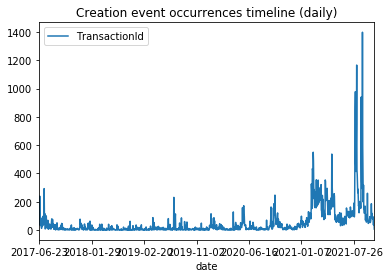

In [68]:
edge_df.loc[edge_df['EventType'] == "created", ['TransactionId', 'date']].groupby('date').count().plot()
plt.title("Creation event occurrences timeline (daily)")

Text(0.5, 1.0, 'Creation event occurrences timeline (monthly)')

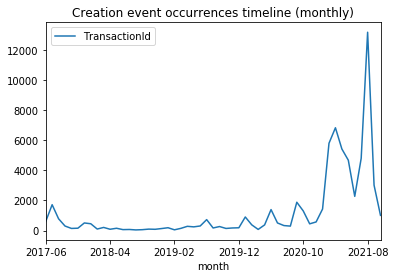

In [69]:
edge_df.loc[edge_df['EventType'] == "created", ['TransactionId', 'month']].groupby('month').count().plot()
plt.title("Creation event occurrences timeline (monthly)")